# **Self training work on data consepts using GDP and life satisfaction**
## The aim of this project is to demonstrate data analysis concepts and to test some hypothesis in this data. 
### The Data was imported from github.com  . Below are the various pakages use in this experiment. The csv file was save as lifesat.

In [48]:
### loading the necessary packages for the entire project. 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.formula.api import ols 
from scipy.stats import norm

import sklearn 

from sklearn.linear_model import LinearRegression

In [49]:
### importing the data set from an online data base and saving the data set as lifesat 

data_root=   "https://github.com/ageron/data/raw/main/"
lifesat= pd.read_csv(data_root + "lifesat/lifesat.csv")
lifesat

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6
5,Portugal,32181.154537,5.4
6,Poland,32238.157259,6.1
7,Estonia,35638.421351,5.7
8,Spain,36215.447591,6.3
9,Slovenia,36547.738956,5.9


In [ ]:
# Data Cleaning. 
## the data is good for analysis but to ease our analysis the headings were simplified. 

In [66]:
## Data cleaning
lifesat
life_sat=lifesat.rename(columns={'GDP per capita (USD)':'GDP', 'Life satisfaction':'life'})

In [54]:
x= lifesat[['GDP per capita (USD)']].values
x
y= lifesat[['Life satisfaction']]

# Understanding the relationship between life satisfaction and gdp per capital
## We noticed from the graph below that as GDp per capital increase so does life satisfation too.
## Implying countries should keep improving  gdp per capital 

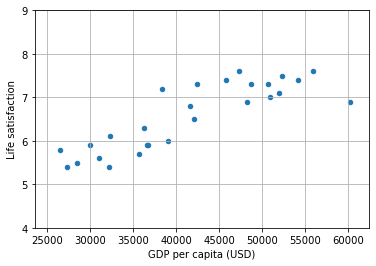

In [55]:
lifesat.plot(kind='scatter',grid=True, x= 'GDP per capita (USD)',
             y =  'Life satisfaction')
plt.axis([23_500, 62_500, 4,9])
plt.show()



# In the following stages , varoiuse statistics test were performed to understand 
## Sampling
### Random sampling.
### Finding the population mean and sample mean of the data set. There was no significants difference between the sample means and popultaion means for life expectancy.  mean was given as 5.6

In [61]:
# Statistic testin using various statistic techniques
## perform some sampling technics on the life state data.
lifsat_pop= life_sat[['GDP', 'life']]

In [60]:
### understanding the data before performing statistical test
lifsat_pop.head()

,GDP,life
0,26456.387938,5.8
1,27287.083401,5.4
2,28384.987785,5.5
3,29932.493910,5.9
4,31007.768407,5.6


In [20]:
##.1  samplelifsat using random statistic(understanding randomstatistics)
lifesat_sample= lifsat_pop.sample(n=10)
lifesat_sample

,GDP,life
25,55938.212809,7.6
18,48210.033111,6.9
19,48697.837028,7.3
14,42025.617373,6.5
16,45856.625626,7.4
7,35638.421351,5.7
5,32181.154537,5.4
12,38992.148381,6.0
6,32238.157259,6.1
4,31007.768407,5.6


In [22]:
## check population paramater
### mean using numpy
import numpy as np
np.mean(lifsat_pop['life'])

6.566666666666666

In [23]:
lifsat_pop['life'].mean()


6.566666666666666

## Does life expectancy follows a normal distribution. 
### plotting both the population and the sample data set shows that the distribution is not normally distributed. 

<AxesSubplot:>

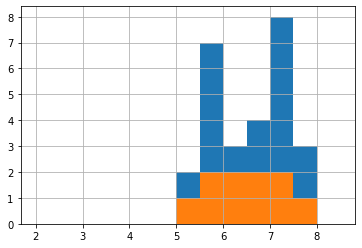

In [62]:
###  visualising  GDP
### Both pop data and sample data
lifsat_pop['life'].hist(bins=np.arange(2,9,0.5))
lifesat_sample['life'].hist(bins=np.arange(2,9,0.5))

# This random number sampling is used to demonstrate a normal curve distribution. 

(array([  0.,   0.,   2.,   8.,  27., 123., 281., 467., 730., 840., 949.,
        701., 458., 262., 108.,  36.,   7.,   1.,   0.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
 <BarContainer object of 19 artists>)

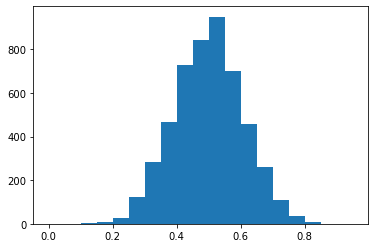

In [27]:
# visualised a random number sample to understand if the plot above follows a simple random distribution grap
random = np.random.beta(a=10, b=10, size=5000)
random
plt.hist(random, bins=np.arange(0,1,.05))

In [63]:
### Performing random sampling on the data set

life_sat.sample(n=5, random_state=19000113)

,Country,GDP,life
3,Latvia,29932.493910,5.9
16,Canada,45856.625626,7.4
19,Australia,48697.837028,7.3
8,Spain,36215.447591,6.3
2,Turkey,28384.987785,5.5


## Understanding systematic sampling. 


In [29]:
### understanding systematic sample
Sample_size= 5
pop_size= len(life_sat)
pop_size

27

In [30]:
interval = pop_size//Sample_size
interval

5

In [ ]:
## systematic sampling

In [31]:
### systematic samplin  and rol selection
life_system= life_sat.iloc[::interval]
life_system

,Country,GDP,life
0,Russia,26456.387938,5.8
5,Portugal,32181.154537,5.4
10,Lithuania,36732.034744,5.9
15,New Zealand,42404.393738,7.3
20,Sweden,50683.323510,7.3
25,Denmark,55938.212809,7.6


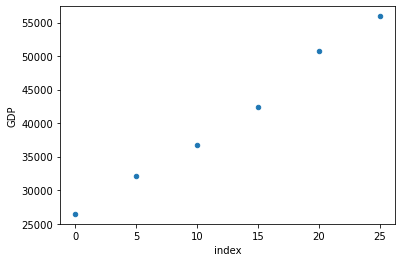

In [67]:
### ploting systematic sampling using reset data set call life_system_Id.
life_system_id= life_system.reset_index()
life_system_id
life_system_id.plot(x="index", y='GDP', kind="scatter")
plt.show()

In [33]:
life_system_id

,index,Country,GDP,life
0,0,Russia,26456.387938,5.8
1,5,Portugal,32181.154537,5.4
2,10,Lithuania,36732.034744,5.9
3,15,New Zealand,42404.393738,7.3
4,20,Sweden,50683.323510,7.3
5,25,Denmark,55938.212809,7.6


# **Hypothesis testing.**
### What is the implication of mean GDP greater than 5000
### We start by  samplig the Data set. 

In [34]:
shuffled= life_sat.sample(frac=1)
shuffled= shuffled.reset_index(drop= True).reset_index()
shuffled

,index,Country,GDP,life
0,0,Turkey,28384.987785,5.5
1,1,Denmark,55938.212809,7.6
2,2,Spain,36215.447591,6.3
3,3,Latvia,29932.493910,5.9
4,4,Lithuania,36732.034744,5.9
5,5,Austria,51935.603862,7.1
6,6,New Zealand,42404.393738,7.3
7,7,Italy,38992.148381,6.0
8,8,Poland,32238.157259,6.1
9,9,Estonia,35638.421351,5.7


<AxesSubplot:xlabel='index', ylabel='GDP'>

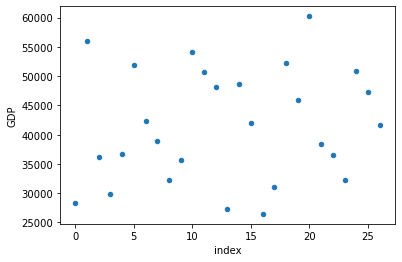

In [35]:
shuffled.plot(x="index", y= 'GDP', kind= "scatter")

## next we calculate the relative errors in the sample distribution
the relative errors was given as 13.922

In [36]:
# calculating relative error
# 100*(pop_mean-sample_mean)/pop_mean

life_sat_mean= life_sat['GDP'].mean()
life_sat_mean
life_sat_sample_mean= life_sat.sample(n=10, )['GDP'].mean()
life_sat_sample_mean
reletive_error= 100*abs(life_sat_mean-life_sat_sample_mean)/life_sat_mean
reletive_error

13.922817390655053

In [37]:
# sample sizes
sample_sizes= len( life_sat.sample(n=10, ))
sample_sizes

10

 ## A boodstrap distribution of the error term.

 Finding the standard error term use in calculating Z-score

In [39]:
# get the error of the standard distribution and means

mean_cup_points_1000=[]
for i in range (1000):
    mean_cup_points_1000.append(
       np.mean(life_sat.sample(frac=1,replace=True)['GDP'])
    )
boodstrap_distn=mean_cup_points_1000

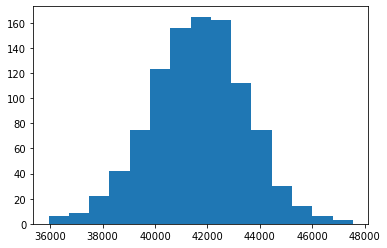

In [40]:
plt.hist(boodstrap_distn, bins=15)
plt.show()


In [41]:
# the standard error of 
std_erre= np.std(boodstrap_distn, ddof=1)

# calculating the population mean .
The population mean was given as 41564. From this means it can clarly be stated that a GDP of 5000 and above signifies an average above the countries average GDP.
This is an indicator that an economy with a gdp above 5000 economy performs better than it peers. However we most test the significanse of our result using Z-score. 

In [127]:
# mean of life_sat
mean = life_sat['GDP'].mean()
mean

41564.521771015454

In [131]:
# gdp greater than 5000 shows a better performing economics
GDP_5000= 5000
Z= (5000-mean)/std_erre
Z

-19.461721035916252